<a href="https://colab.research.google.com/github/apoorv2512/INBT/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task2

In [80]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df=pd.read_csv('/content/drive/MyDrive/iNeuBytes/AQI.csv')

In [82]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 3.3+ MB


In [84]:
df.shape

(43824, 10)

In [85]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,43824.0,2012.000000,1.413842,2010.00,2011.00,2012.00,2013.00,2014.0
month,43824.0,6.523549,3.448572,1.00,4.00,7.00,10.00,12.0
day,43824.0,15.727820,8.799425,1.00,8.00,16.00,23.00,31.0
hour,43824.0,11.500000,6.922266,0.00,5.75,11.50,17.25,23.0
pm2.5,41757.0,98.613215,92.050387,0.00,29.00,72.00,137.00,994.0
DEWP,43824.0,1.817246,14.433440,-40.00,-10.00,2.00,15.00,28.0
TEMP,43824.0,12.448521,12.198613,-19.00,2.00,14.00,23.00,42.0
PRES,43824.0,1016.447654,10.268698,991.00,1008.00,1016.00,1025.00,1046.0
Iws,43824.0,23.889140,50.010635,0.45,1.79,5.37,21.91,585.6


In [86]:
df.isnull().sum()

year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
dtype: int64

In [87]:
df['pm2.5'].fillna(df[ "pm2.5"].mean(),inplace=True)

In [88]:
df.isnull().sum()

year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
dtype: int64

In [89]:
# Encoding categorical variable
cat_values=[]
cont_values=[]
for columns in df.columns:
    if df[columns].nunique()<=10:
        cat_values.append(columns)
    else:
        cont_values.append(columns)

In [90]:
cat_values

['year', 'cbwd']

In [91]:
cont_values

['month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']

In [92]:
df['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [93]:
df1=pd.get_dummies(df,columns=cat_values,drop_first=True)

In [94]:
df1.head()

,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,year_2011,year_2012,year_2013,year_2014,cbwd_NW,cbwd_SE,cbwd_cv
0,1,1,0,98.613215,-21,-11.0,1021.0,1.79,0,0,0,0,1,0,0
1,1,1,1,98.613215,-21,-12.0,1020.0,4.92,0,0,0,0,1,0,0
2,1,1,2,98.613215,-21,-11.0,1019.0,6.71,0,0,0,0,1,0,0
3,1,1,3,98.613215,-21,-14.0,1019.0,9.84,0,0,0,0,1,0,0
4,1,1,4,98.613215,-20,-12.0,1018.0,12.97,0,0,0,0,1,0,0


In [95]:
df.tail()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72
43823,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85


In [96]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_copy = df.drop(['year','month','day','hour'],axis=1)
df_copy['cbwd'] = encoder.fit_transform(df_copy['cbwd'])
df_copy

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws
0,98.613215,-21,-11.0,1021.0,1,1.79
1,98.613215,-21,-12.0,1020.0,1,4.92
2,98.613215,-21,-11.0,1019.0,1,6.71
3,98.613215,-21,-14.0,1019.0,1,9.84
4,98.613215,-20,-12.0,1018.0,1,12.97
...,...,...,...,...,...,...
43819,8.000000,-23,-2.0,1034.0,1,231.97
43820,10.000000,-22,-3.0,1034.0,1,237.78
43821,10.000000,-22,-3.0,1034.0,1,242.70
43822,8.000000,-22,-4.0,1034.0,1,246.72


EDA

Text(0, 0.5, 'counts')

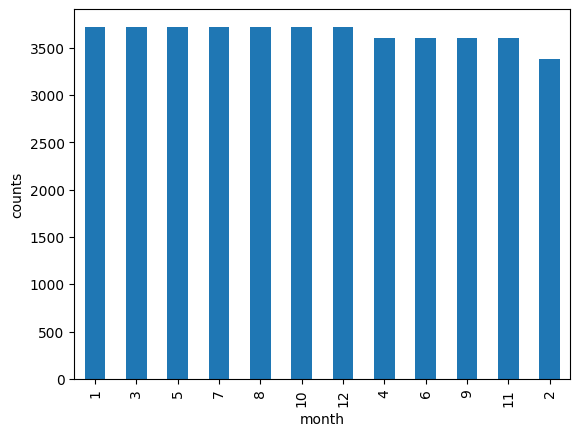

In [97]:
df['month'].value_counts().plot.bar()
plt.xlabel('month')
plt.ylabel('counts')

<Axes: xlabel='cbwd', ylabel='Count'>

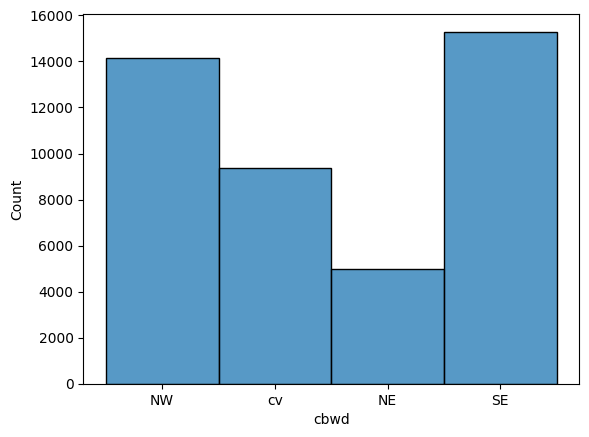

In [98]:
sns.histplot(data=df['cbwd'])

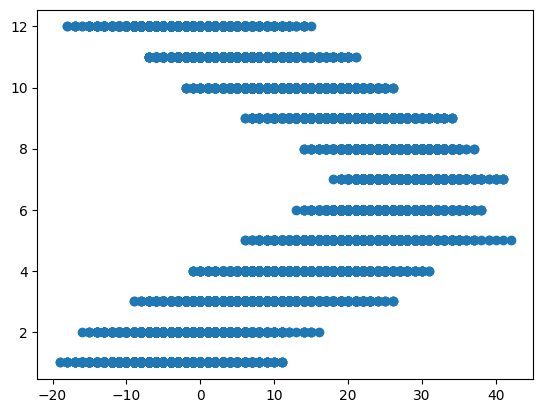

In [99]:
plt.scatter(x=df['TEMP'],y=df['month'])

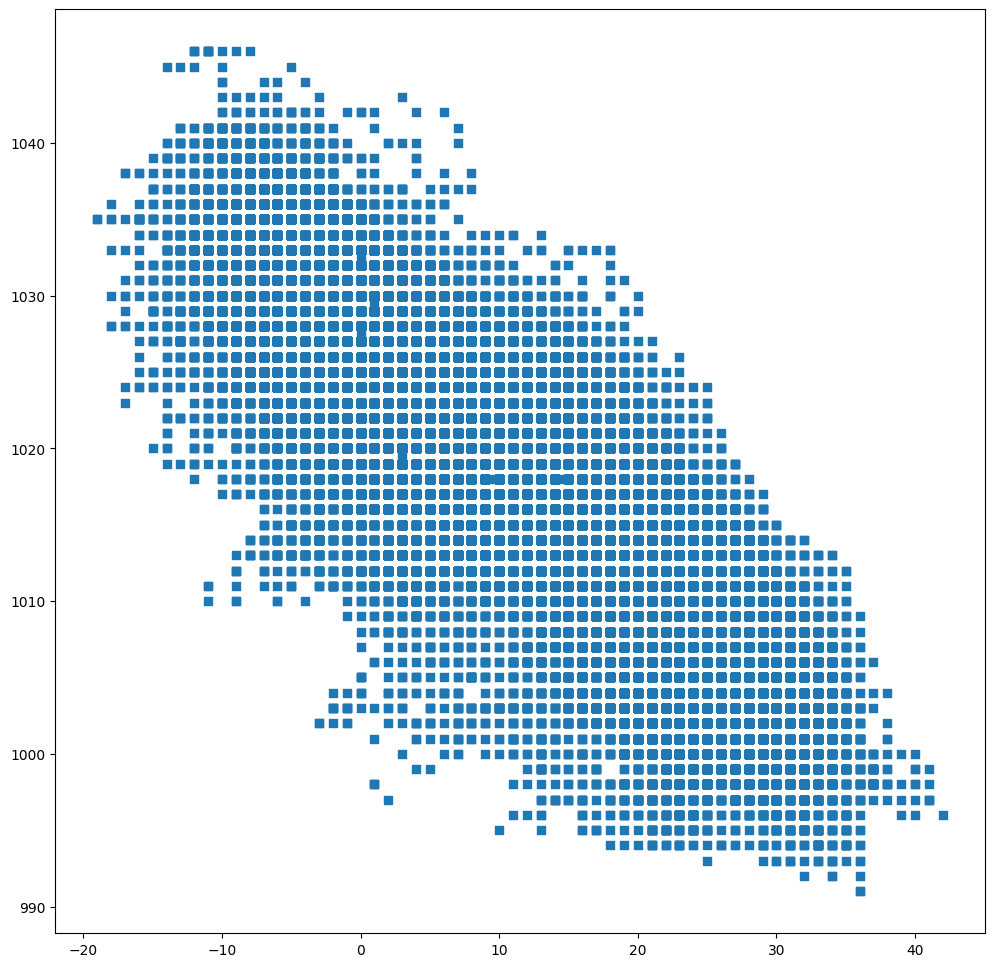

In [100]:
plt.figure(figsize=(12,12))
plt.scatter(x=df['TEMP'],y=df['PRES'],marker='s')

Model Implementation

In [101]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics


In [102]:
x = df_copy.iloc[:,:].drop(['pm2.5'],axis=1)
y = df_copy.iloc[:,0]


In [103]:
x

,DEWP,TEMP,PRES,cbwd,Iws
0,-21,-11.0,1021.0,1,1.79
1,-21,-12.0,1020.0,1,4.92
2,-21,-11.0,1019.0,1,6.71
3,-21,-14.0,1019.0,1,9.84
4,-20,-12.0,1018.0,1,12.97
...,...,...,...,...,...
43819,-23,-2.0,1034.0,1,231.97
43820,-22,-3.0,1034.0,1,237.78
43821,-22,-3.0,1034.0,1,242.70
43822,-22,-4.0,1034.0,1,246.72


In [104]:
y

0        98.613215
1        98.613215
2        98.613215
3        98.613215
4        98.613215
           ...    
43819     8.000000
43820    10.000000
43821    10.000000
43822     8.000000
43823    12.000000
Name: pm2.5, Length: 43824, dtype: float64

In [105]:
#Splitting dataset into Train and Test Set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train,y_train

(       DEWP  TEMP    PRES  cbwd    Iws
 24250    11  17.0  1025.0     3   0.89
 10207   -14  -7.0  1027.0     3   3.12
 18481   -22  -3.0  1029.0     1  36.67
 18596   -22  -6.0  1029.0     0   2.68
 36811   -18  12.0  1014.0     2  30.39
 ...     ...   ...     ...   ...    ...
 43723    -9   0.0  1026.0     3   2.68
 32511    11  26.0  1009.0     2  10.28
 5192     20  25.0  1006.0     1  22.80
 12172     5  14.0  1012.0     2   3.58
 33003    11  13.0  1020.0     0   0.89
 
 [30676 rows x 5 columns],
 24250     85.0
 10207     44.0
 18481      4.0
 18596     38.0
 36811     32.0
          ...  
 43723    328.0
 32511     37.0
 5192      33.0
 12172     78.0
 33003    187.0
 Name: pm2.5, Length: 30676, dtype: float64)

In [106]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_trained_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Implementation of Ridge Regressor Model

In [107]:
rr = Ridge()
rr.fit(x_train,y_train)
y_train_predict_rr = rr.predict(x_train)
y_test_predict_rr = rr.predict(x_test)

Implementation of Random Forest Regressor Model

In [108]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train,y_train)
y_train_predict_rfr = rfr.predict(x_train)
y_test_predict_rfr = rfr.predict(x_test)

**Model Evaluation**

Ridge Regressor

In [109]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [110]:
# Evaluating for training data
MSE_train = mean_squared_error(y_train_predict_rr,y_train)
MAE_train = mean_absolute_error(y_train_predict_rr,y_train)
RMSE_train = np.sqrt(MSE_train)
score_train = r2_score(y_train,y_train_predict_rr)

In [111]:
MSE_train,MAE_train,RMSE_train,score_train

(6191.84000475988, 56.67617763616452, 78.688245658166, 0.23122957876929595)

In [112]:
# Evaluating for testing data
MSE_test = mean_squared_error(y_test_predict_rr,y_test)
MAE_test = mean_absolute_error(y_test_predict_rr,y_test)
RMSE_test = np.sqrt(MSE_test)
score_test = r2_score(y_test,y_test_predict_rr)

In [113]:
MSE_test,MAE_test,RMSE_test,score_test

(6273.32026908415, 57.11765540591433, 79.2042945116245, 0.22720627219607636)

Random Forest Regressor

In [114]:
# for training data
MSE_train_RFR = mean_squared_error(y_train_predict_rfr,y_train)
MAE_train_RFR = mean_absolute_error(y_train_predict_rfr,y_train)
RMSE_train_RFR = np.sqrt(MSE_train_RFR)
score_train_RFR = r2_score(y_train,y_train_predict_rfr)

In [115]:
MSE_train_RFR,MAE_train_RFR,RMSE_train_RFR,score_train_RFR

(796.5836192109042, 18.261296376269506, 28.22381298143297, 0.9010972628466691)

In [116]:
# for testing data
MSE_test_RFR = mean_squared_error(y_test_predict_rfr,y_test)
MAE_test_RFR = mean_absolute_error(y_test_predict_rfr,y_test)
RMSE_test_RFR = np.sqrt(MSE_test_RFR)
score_test_rfr = r2_score(y_test,y_test_predict_rfr)

In [117]:
print(" Accuracy on test data set")
print(" Accuracy on Ridge Regressor test data set :         ",RR.score(X_test,Y_test))
print(" Accuracy on Random Forest Regressor test data set : ",regressor.score(X_test,Y_test))
acc_rr_test=RR.score(X_test,Y_test)
acc_rfr_test=regressor.score(X_test,Y_test)

 Accuracy on test data set
 Accuracy on Ridge Regressor test data set :          0.2578218761914026
 Accuracy on Random Forest Regressor test data set :  0.37780537168948547


In [118]:
MSE_test_RFR,MAE_test_RFR,RMSE_test_RFR,score_test_rfr


(5067.711572674843, 47.659082278505984, 71.18786113288446, 0.3757220180543689)

**Checking for accuracy of both models**


Accuracy on training data


In [119]:
print("Accuracy on Training set:")
output_train = pd.DataFrame({'Model':['Ridge Regressor','Random Forest Regressor'], 'Accuracy':[metrics.r2_score(y_train,y_train_predict_rr)*100, metrics.r2_score(y_train,y_train_predict_rfr)*100]})
output_train

Accuracy on Training set:


,Model,Accuracy
0,Ridge Regressor,23.122958
1,Random Forest Regressor,90.109726



Accuracy on testing data

In [120]:
print("Accuracy on Testing set:")
output_test = pd.DataFrame({'Model':['Ridge Regressor','Random Forest Regressor'], 'Accuracy':[metrics.r2_score(y_test,y_test_predict_rr)*100, metrics.r2_score(y_test,y_test_predict_rfr)*100]})
output_test

Accuracy on Testing set:


,Model,Accuracy
0,Ridge Regressor,22.720627
1,Random Forest Regressor,37.572202


**Cross Validation**

In [121]:
# RIDGE REGRESSION -
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

In [122]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
clf_ridge = RandomizedSearchCV(ridge,param_distributions=param_grid,scoring='neg_mean_squared_error',cv=10,verbose=3)


In [123]:
clf_ridge.fit(x_trained_scaled,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END ....................alpha=0.1;, score=-6155.087 total time=   0.0s
[CV 2/10] END ....................alpha=0.1;, score=-5772.901 total time=   0.0s
[CV 3/10] END ....................alpha=0.1;, score=-6281.216 total time=   0.0s
[CV 4/10] END ....................alpha=0.1;, score=-6371.018 total time=   0.0s
[CV 5/10] END ....................alpha=0.1;, score=-6328.859 total time=   0.0s
[CV 6/10] END ....................alpha=0.1;, score=-6018.439 total time=   0.0s
[CV 7/10] END ....................alpha=0.1;, score=-6348.124 total time=   0.0s
[CV 8/10] END ....................alpha=0.1;, score=-6103.424 total time=   0.0s
[CV 9/10] END ....................alpha=0.1;, score=-6327.847 total time=   0.0s
[CV 10/10] END ...................alpha=0.1;, score=-6242.940 total time=   0.0s
[CV 1/10] END ....................alpha=1.0;, score=-6155.123 total time=   0.0s
[CV 2/10] END ....................alpha=1.0;, sc

RandomizedSearchCV(cv=10, estimator=Ridge(),
                   param_distributions={'alpha': [0.1, 1.0, 10.0, 100.0]},
                   scoring='neg_mean_squared_error', verbose=3)

In [124]:
y_pred_ridge_clf = clf_ridge.predict(x_test_scaled)
y_pred_ridge_clf

array([139.62658046, 123.43145389,  99.97476334, ..., 112.5774196 ,
       135.68121614, 107.1974602 ])

In [125]:
# Evaluation -
MSE_CV_RIDGE = mean_squared_error(y_pred_ridge_clf,y_test)
MAE_CV_RIDGE = mean_absolute_error(y_pred_ridge_clf,y_test)
RMSE_CV_RIDGE = np.sqrt(MSE_CV_RIDGE)
score_cv_ridge = r2_score(y_test,y_pred_ridge_clf)
print('MSE_CV_RIDGE :',MSE_CV_RIDGE , 'MAE_CV_RIDGE :',MAE_CV_RIDGE , 'RMSE_CV_RIDGE :',RMSE_CV_RIDGE ,'score_cv_ridge :',score_cv_ridge)


MSE_CV_RIDGE : 6273.315601541584 MAE_CV_RIDGE : 57.11721690960915 RMSE_CV_RIDGE : 79.2042650464076 score_cv_ridge : 0.22720684717829698


In [126]:
# Random forest classifier -- >

param_grid_rfc = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [127]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()

In [128]:
clf_RFR = RandomizedSearchCV(RFR,param_distributions=param_grid_rfc,cv=10,scoring='accuracy')

In [129]:
import warnings
warnings.filterwarnings('ignore')
clf_RFR.fit(x_trained_scaled,y_train)


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   scoring='accuracy')

In [130]:
y_pred_RFRcv = clf_RFR.predict(x_test_scaled)
y_pred_RFRcv

array([159.28143906,  79.52069697,  46.92389366, ..., 105.95184212,
       106.18017519,  33.19626495])

In [131]:
# Evaluation -
MSE_CV_RFR = mean_squared_error(y_pred_RFRcv,y_test)
MAE_CV_RFR = mean_absolute_error(y_pred_RFRcv,y_test)
RMSE_CV_RFR = np.sqrt(MSE_CV_RFR)
score_cv_rfr = r2_score(y_test,y_pred_RFRcv)
print("MSE_CV_RFR :",MSE_CV_RFR)
print("MAE_CV_RFR :",MAE_CV_RFR)
print("RMSE_CV_RFR :", RMSE_CV_RFR)
print("score_cv_rfr : ", score_cv_rfr)

MSE_CV_RFR : 4900.367213886229
MAE_CV_RFR : 48.29900600862079
RMSE_CV_RFR : 70.0026229071899
score_cv_rfr :  0.3963367269020157
